## 나이브베이즈 분류모형


    QDA + 조건부 독립

### 조건부 독립

확률변수 A,B가 독립이면 A,B의 결합확률은 주변확률의 곱과 같다

$P(A,B) = P(A)P(B)$

조건부독립은 일반적인 독립과 달리 조건이 되는 별개의 확률변수 C가 존재해야 한다. 조건이 되는 확률변수 C에 대한 A,B의 결합조건부확률이 C에 대한 A,B의 조건부확률의 곱과 같으면 A와 B가 C에대한 조건부 독립이라고 한다.

$P(A,B|C) = P(A|C)P(B|C)$

기호로는 다음과 같이 표기한다.

$A \text{⫫} B \;\vert\; C$

무조건부독립은 공집합을 쓴다


$A \text{⫫} B \;\vert\; 0(공집합)$

A,B 가 C에 대해 조건부 독립이면 다음도 만족한다.

$P(A|B,C) = P(A|C)$

$P(B|A,C) = P(B|C)$

예를 들어 어떤 동물의 어미의 몸무게가  x kg일 때 새끼의 몸무게는  x 를 기댓값으로 하고 5kg 표준편차를 가지는 정규분포라고 가정하자. 이 동물의 새끼 중 2마리의 몸무게를 각각 A, B라고 하고 어미의 몸무게를 C라고 한다. 시물레이션을 통해 어미 표본과 각각의 어미에 대해 2마리의 새끼 표본을 만들자.

In [11]:
import warnings
 
warnings.filterwarnings("ignore")
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)


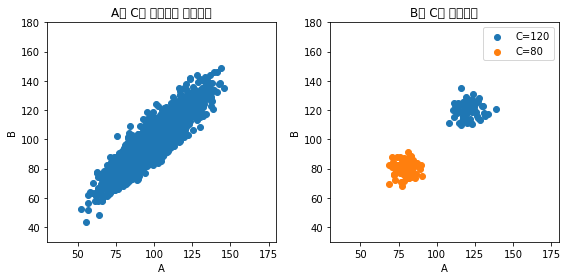

In [12]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(A,B)
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(30,180)
plt.ylim(30,180)
plt.title('A와 C의 무조건부 상관관계')

plt.subplot(122)
idx1 = (118<C) & (C< 122)
idx2 = (78<C) & (C< 82)
plt.scatter(A[idx1],B[idx1],label='C=120')
plt.scatter(A[idx2],B[idx2],label='C=80')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(30,180)
plt.ylim(30,180)
plt.legend()
plt.title('B와 C의 상관관계')

plt.tight_layout()
plt.show()

### 나이브 가정

독립변수 x 가 D차원이라고 가정하자.

$x = (x_1, \ldots, x_D)$

가능도 함수는 $x_1, \ldots, x_D$ 의 결합확률이 된다.

$P(x \mid y = k) = P(x_1, \ldots, x_D \mid y = k)$

원리상으로는 y = k 인 데이터만 모아서 이 가능도함수의 모양을 추정할 수 있다. 하지만 차원 D가 커지면 가능도 함수의 추정이 현실적으로 어려워진다. 따라서 나이브베이즈 분류모형 에서는 모든 차원의 개별 독립변수가 서로 조건부 독립 이라는 가정을 사용한다 이러한 가정을 __나이브 가정__ 이라고 한다. 나이브 가정으로 사용하면 벡터 x의 결합확률분포함수는 개별 스칼라 원소 $x_d$의 확률분포함수의 곱이 된다.

$P(x_1, \ldots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y = k)$

스칼라 원소 $x_d$의 확률분포함수는 결합확률분포함수보다 추정하기가 훨씬 쉽다.

가능도함수를 추정한 후에는 베이즈 정리를 사용하여 조건부확률을 계산할 수 있다.

$\begin{align}
P(y = k \mid x) 
&= \dfrac{ P(x_1, \ldots, x_D \mid y = k) P(y = k) }{P(x)} \\
&= \dfrac{ \left( \prod_{d=1}^D P(x_{d} \mid y = k) \right) P(y = k) }{P(x)}
\end{align}$

### 정규분포 가능도 모형

x 벡터의 원소가 모두 실수이고 클래스마다 특정한 값 주변에서 발생한다고 하면 가능도 분포로 정규분포를 사용한다. 각 독립변수 $x_d$마다, 그리고 클래스 k마다 정규 분포의 기대값 $\mu_{d,k}$, 표준편차 $\sigma_{d,k}^2$가 달라진다. QDA 모형과는 달리 모든 독립변수들이 서로 조건부독립이라고 가정한다. 

$P(x_d \mid y = k) = \dfrac{1}{\sqrt{2\pi\sigma_{d,k}^2}} \exp \left(-\dfrac{(x_d-\mu_{d,k})^2}{2\sigma_{d,k}^2}\right)$

-> 단변수 정규분포를 곱해놓은것

### 베르누이분포 가능도 모형

베르누이분포 가능도 모형에서는 각각의 $x = (x_1,\ldots, x_D)$의 각 원소 $x_d$가 0 또는 1이라는 값만을 가질 수 있다. 즉 독립변수는 D개의 독립적인 베르누이 확률변수, 즉 동전으로 구성된 동전 세트로 표현할 수 있다. 이 동전들의 모수 $ \mu_d $는 동전 d마다 다르다.

$P(x_d \mid y = k) = \mu_{d,k}^{x_d} (1-\mu_{d,k})^{(1-x_d)}$

$P(x_1, \ldots, x_D \mid y = k) 
= \prod_{d=1}^D \mu_{d,k}^{x_d} (1-\mu_{d,k})^{(1-x_d)}$


### 다항분포 가능도 모형

다항분포 모형에서는 x 벡터가 다항분포의 표본이라고 가정한다. 즉 D개의 면을 가지는 주사위를 $\sum_{d=1}^D x_d$번 던져서 나온 결과로 본다

#### 예제

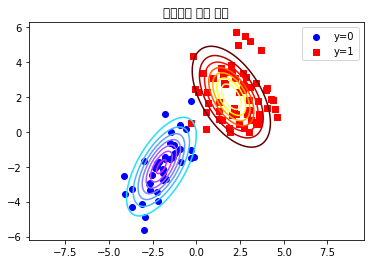

In [5]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2,-2],[[1,0.9],[0.9,2]])
rv1 = sp.stats.multivariate_normal([2,2],[[1.2,0.8],[-0.8,2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0,X1])
y = np.hstack([np.zeros(40),np.ones(60)])

xx1 = np.linspace(-5,5,100)
xx2 = np.linspace(-5,5,100)

XX1, XX2 = np.meshgrid(xx1,xx2)
plt.grid(False)
plt.contour(XX1,XX2, rv0.pdf(np.dstack([XX1,XX2])),cmap=mpl.cm.cool)
plt.contour(XX1,XX2, rv1.pdf(np.dstack([XX1,XX2])),cmap=mpl.cm.hot)
plt.scatter(X0[:,0],X0[:,1], marker='o',c='b',label='y=0')
plt.scatter(X1[:,0],X1[:,1], marker='s',c='r',label='y=1')
plt.legend()
plt.title('데이터의 확률 분포')
plt.axis('equal')
plt.show()

In [6]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X,y)

In [7]:
model_norm.classes_

array([0., 1.])

In [9]:
model_norm.class_count_

array([40., 60.])

In [10]:
model_norm.class_prior_

array([0.4, 0.6])

In [ ]:
from sklearn.matrics import classification_report


classification_report(y, model_nirm.predict(X), target_names=[
    'sedosa', 'vsrsicolor', 'virginia'])

fromk  

### 스케일링은 트레이닝데이터에만 하는것 -> 모델을 만든후 테스트에 적용시킬땐 테스트데이터엔 스케일링을 하지않는다.

### 베르누이분포 나이브베이즈 모형

$\log \mu_k = (\log \mu_{1,k}, \ldots, \log \mu_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$

#########################################

### 스무딩

표본데이터의 수가 적은 경우에는 베르누이 모수가 0 또는 1 이라는 극단적인 모수 추정값이 나올 수도 있다. 하지만 현실적으로는 실제 모수값이 이런 극단적인 값이 나올 가능성이 적다. 따라서 베르누이 모수가 0.5인 가장 일반적인 경우를 가정하여 0이 나오는 경우와 1이 나오는 경우, 두 개의 가상 표본 데이터를 추가한다. 그러면 0 이나 1 과 같은 극단적인 추정값이 0.5에 가까운 다음과 값으로 변한다. 이를 __라플라스 스무딩 또는 애드원 스무딩__ 이라고 한다.

$\hat{\mu}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + 2 \alpha}$

가중치  α 를 사용하여 스무딩의 정도를 조절할 수도 있다. 가중치  α 는 정수가 아니라도 괜찮다. 가중치가 1인 경우는 무정보 사전확률을 사용한 베이즈 모수추정의 결과와 같다.

In [14]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.naive_bayes import BernoulliNB

model_bern = BernoulliNB().fit(X,y)

In [17]:
model_bern.classes_

array([0, 1])

In [19]:
model_bern.class_count_

array([4., 6.])

In [20]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [21]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [22]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [23]:
model_bern.alpha

1.0

In [24]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [49]:
x_new = np.array([0, 1, 1, 1])

In [50]:
model_bern.predict_proba([x_new])

array([[0.34501348, 0.65498652]])

In [51]:
from sklearn.datasets import load_digits

digits = load_digits()

In [52]:
X = digits.data

In [53]:
X.shape

(1797, 64)

In [54]:
X[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [55]:
from sklearn.preprocessing import Binarizer

X2 = Binarizer(7).fit_transform(X)

In [56]:
X2[0,:]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

(-0.5, 7.5, 7.5, -0.5)

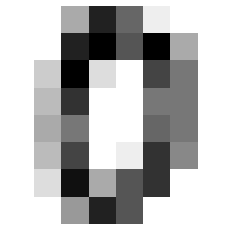

In [58]:
plt.imshow(digits.images[0,:,:],cmap=plt.cm.binary)
plt.axis('off')

In [59]:
X = digits.data
y = digits.target

In [60]:
model_bern2 = BernoulliNB().fit(X,y)

In [64]:
model_bern2.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
model_bern2.class_count_

array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.])

In [66]:
fc = model_bern2.feature_count_
fc

array([[  0.,   2., 159., 178., 177., 136.,   6.,   0.,   0.,  62., 177.,
        178., 177., 178.,  58.,   0.,   0., 152., 178., 144.,  94., 177.,
        143.,   0.,   0., 171., 178.,  69.,  13., 177., 175.,   0.,   0.,
        175., 178.,  38.,   4., 178., 173.,   0.,   0., 160., 178.,  75.,
         71., 178., 161.,   0.,   0.,  65., 178., 178., 174., 178., 109.,
          0.,   0.,   1., 164., 178., 178., 161.,  23.,   0.],
       [  0.,   2.,  93., 152., 171., 126.,  50.,   0.,   0.,  11., 115.,
        175., 175., 146.,  48.,   0.,   1.,  44., 144., 181., 182., 139.,
         29.,   0.,   1.,  75., 157., 177., 181., 133.,  18.,   0.,   0.,
         55., 137., 164., 182., 123.,  15.,   0.,   0.,  31.,  97., 150.,
        181., 125.,  19.,   0.,   0.,  10., 114., 157., 182., 136.,  58.,
         25.,   0.,   1.,  94., 150., 182., 150.,  68.,  27.],
       [  0.,  73., 168., 175., 173.,  80.,   8.,   0.,   1., 138., 171.,
        177., 176., 116.,  17.,   0.,   1., 115., 152., 131.

In [68]:
fc / np.repeat(model_bern2.class_count_[:, np.newaxis], 4, axis=1)

ValueError: operands could not be broadcast together with shapes (10,64) (10,4) 

In [72]:
y_pred = np.exp(model_bern2.feature_log_prob_)
y_pred

array([[0.00555556, 0.01666667, 0.88888889, 0.99444444, 0.98888889,
        0.76111111, 0.03888889, 0.00555556, 0.00555556, 0.35      ,
        0.98888889, 0.99444444, 0.98888889, 0.99444444, 0.32777778,
        0.00555556, 0.00555556, 0.85      , 0.99444444, 0.80555556,
        0.52777778, 0.98888889, 0.8       , 0.00555556, 0.00555556,
        0.95555556, 0.99444444, 0.38888889, 0.07777778, 0.98888889,
        0.97777778, 0.00555556, 0.00555556, 0.97777778, 0.99444444,
        0.21666667, 0.02777778, 0.99444444, 0.96666667, 0.00555556,
        0.00555556, 0.89444444, 0.99444444, 0.42222222, 0.4       ,
        0.99444444, 0.9       , 0.00555556, 0.00555556, 0.36666667,
        0.99444444, 0.99444444, 0.97222222, 0.99444444, 0.61111111,
        0.00555556, 0.00555556, 0.01111111, 0.91666667, 0.99444444,
        0.99444444, 0.9       , 0.13333333, 0.00555556],
       [0.00543478, 0.01630435, 0.51086957, 0.83152174, 0.93478261,
        0.69021739, 0.27717391, 0.00543478, 0.00543478, 0.0